# Basic Analytics of PlanetScope imagery

In this exercise we will perform some basic analytics of PlanetScope imagery stored under your folder on our AWS bucket, which you would have downloaded using your copy of the [basemap downloader notebook](https://github.com/agroimpacts/nmeo/blob/class/s2022/materials/code/notebooks/planet_basemap_downloader.ipynb).

## Setup

### Imports

In [30]:
import cloudtools as ct
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

import re

### Paths and variables

Details of your prefix on our AWS bucket here

In [2]:
bucket = 'geog287387'
prefix = 'g387_testuser'

S3 credentials and list of imagery on the bucket

In [5]:
s3resource = ct.aws_resource('s3', profile=None)
image_list = ct.list_objects(s3resource, bucket = bucket, prefix = prefix, 
                             suffix = '.tif')
image_list

['g387_testuser/nicfi/planet_medres_normalized_analytic_2021-11_mosaic_1015-1068.tif',
 'g387_testuser/nicfi/planet_medres_normalized_analytic_2021-11_mosaic_1016-1068.tif',
 'g387_testuser/nicfi/planet_medres_normalized_analytic_2021-12_mosaic_1015-1068.tif',
 'g387_testuser/nicfi/planet_medres_normalized_analytic_2021-12_mosaic_1016-1068.tif',
 'g387_testuser/nicfi/tile565867_2021-11_buf179_cog.tif']

## Analyses

There are several images in this bucket. You might have a different list depending on what you previously downloaded.  But you should all have mosaics from grids 1015-1068, so let's filter for those

In [17]:
grid = '1015-1068'  # define grid number here
selected_images = []
for image in image_list:
    if re.search(grid, image):
        selected_images.append(image)
        
selected_images

['g387_testuser/nicfi/planet_medres_normalized_analytic_2021-11_mosaic_1015-1068.tif',
 'g387_testuser/nicfi/planet_medres_normalized_analytic_2021-12_mosaic_1015-1068.tif']

### Load in images

We are going to use `rioxarray` functions to do this. 

In [21]:
loaded_images = []
for image in selected_images:
    s3_key = '/vsis3/{}/{}'.format(bucket, image)  # make path for s3 read
    loaded_images.append(rxr.open_rasterio(s3_key)) # load and append to list

In [26]:
print(loaded_images)

[<xarray.DataArray (band: 5, y: 4096, x: 4096)>
[83886080 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1 2 3 4 5
  * x            (x) float64 -1.761e+05 -1.761e+05 ... -1.566e+05 -1.565e+05
  * y            (y) float64 8.806e+05 8.805e+05 8.805e+05 ... 8.61e+05 8.61e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0, <xarray.DataArray (band: 5, y: 4096, x: 4096)>
[83886080 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1 2 3 4 5
  * x            (x) float64 -1.761e+05 -1.761e+05 ... -1.566e+05 -1.565e+05
  * y            (y) float64 8.806e+05 8.805e+05 8.805e+05 ... 8.61e+05 8.61e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0]


### Calculate NDVI from imagery

In [69]:
ndvi_list = []
for image in loaded_images:
    b4 = image[4].astype(float)
    b3 = image[3].astype(float)
    ndvi = (b4 - b3) / (b4 + b3)
    ndvi_list.append(ndvi)

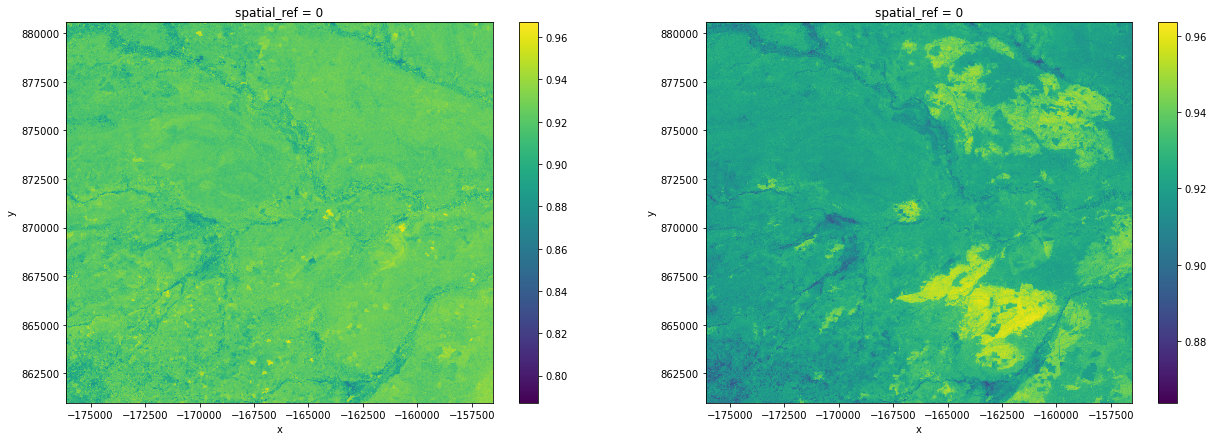

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(21,7))
for i in range(len(ax)):
    ndvi_list[i].plot(ax = axes[i])

### NDVI difference between dates

In [71]:
ndvi_diff = ndvi_list[1] - ndvi_list[0]

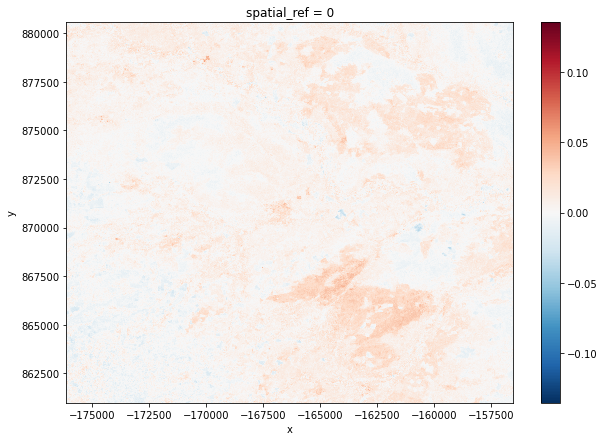

In [72]:
ndvi_diff.plot(figsize=(10,7))

## Save Results

Save the NDVI images to a new folder in your bucket

In [75]:
# dates = ['2021-11', '2021-12']
# for ndvi in ndvi_list:
#     out_key = '/vsis3/{}/{}/analyses/ndvi/ndvi_{}_{}.tif'.format(
#         bucket, prefix, grid, dates[0]
#     )
#     print(out_key)
#     ndvi_list[0].rio.to_raster(out_key)